<a href="https://colab.research.google.com/github/AinSern/Cognitive-Resurgence-Machine-Learning-Approaches-to-Drug-Repurposing-in-Alzheimer-s/blob/main/Drug_Alzemerirs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv

# Path to your CSV file
csv_file_path = '/content/drive/MyDrive/project/DrugBank.txt'

# Open the CSV file
with open(csv_file_path, mode='r', encoding='utf-8') as file:
    # Create a CSV reader
    csv_reader = csv.reader(file)

    # Fetch and print the header row if it exists
    header_row = next(csv_reader)
    print(f'Header: {header_row}')

    # Iterate over each row in the CSV file
    for row in csv_reader:
        # Print the row
        print(row)


Header: ['DB00303 P45059 [H][C@]12[C@@H](C)C(S[C@]3([H])CN[C@@]([H])(C3)C(=O)NC3=CC=CC(=C3)C(O)=O)=C(N1C(=O)[C@]2([H])[C@@H](C)O)C(O)=O MVKFNSSRKSGKSKKTIRKLTAPETVKQNKPQKVFEKCFMRGRYMLSTVLILLGLCALVARAAYVQSINADTLSNEADKRSLRKDEVLSVRGSILDRNGQLLSVSVPMSAIVADPKTMLKENSLADKERIAALAEELGMTENDLVKKIEKNSKSGYLYLARQVELSKANYIRRLKIKGIILETEHRRFYPRVEEAAHVVGYTDIDGNGIEGIEKSFNSLLVGKDGSRTVRKDKRGNIVAHISDEKKYDAQDVTLSIDEKLQSMVYREIKKAVSENNAESGTAVLVDVRTGEVLAMATAPSYNPNNRVGVKSELMRNRAITDTFEPGSTVKPFVVLTALQRGVVKRDEIIDTTSFKLSGKEIVDVAPRAQQTLDEILMNSSNRGVSRLALRMPPSALMETYQNAGLSKPTDLGLIGEQVGILNANRKRWADIERATVAYGYGITATPLQIARAYATLGSFGVYRPLSITKVDPPVIGKRVFSEKITKDIVGILEKVAIKNKRAMVEGYRVGVKTGTARKIENGHYVNKYVAFTAGIAPISDPRYALVVLINDPKAGEYYGGAVSAPVFSNIMGYALRANAIPQDAEAAENTTTKSAKRIVYIGEHKNQKVN 1']
['DB00114 P19113 CC1=NC=C(COP(O)(O)=O)C(C=O)=C1O MMEPEEYRERGREMVDYICQYLSTVRERRVTPDVQPGYLRAQLPESAPEDPDSWDSIFGDIERIIMPGVVHWQSPHMHAYYPALTSWPSLLGDMLADAINCLGFTWASSPACTELEMNVMDWLAKMLGLPEHFLHHHPSSQGGGVLQSTVSESTLIALLAARKNKILEMKTSEPDADESCLNARLVAYASDQAHSSVEKA

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['DB00552 P61432 OC[C@H]1O[C@H](C[C@@H]1O)N1C=NC2=C1N=CNC[C@H]2O MINKDIYQALQQLIPNEKIKVDEPLKRYTYTKTGGNADFYITPTKNEEVQAVVKYAYQNEIPVTYLGNGSNIIIREGGIRGIVISLLSLDHIEVSDDAIIAGSGAAIIDVSRVARDYALTGLEFACGIPGSIGGAVYMNAGAYGGEVKDCIDYALCVNEQGSLIKLTTKELELDYRNSIIQKEHLVVLEAAFTLAPGKMTEIQAKMDDLTERRESKQPLEYPSCGSVFQRPPGHFAGKLIQDSNLQGHRIGGVEVSTKHAGFMVNVDNGTATDYENLIHYVQKTVKEKFGIELNREVRIIGEHPKES 0']
['DB04933 P09252 [H]\\C(CCCCCC)=C(/[H])CCCCCCCCCC(O)=N[C@@]1([H])[C@]([H])(OC[C@@]2([H])O[C@]([H])(OP(O)(O)=O)[C@]([H])(N=C(O)CC(=O)CCCCCCCCCCC)[C@@]([H])(OCCCCCCCCCC)[C@]2([H])O)O[C@]([H])(COC)[C@@]([H])(OP(O)(O)=O)[C@]1([H])OCC[C@@]([H])(CCCCCCC)OC MAIRTGFCNPFLTQASGIKYNPRTGRGSNREFLHSYKTTMSSFQFLAPKCLDEDVPMEERKGVHVGTLSRPPKVYCNGKEVPILDFRCSSPWPRRVNIWGEIDFRGDKFDPRFNTFHVYDIVETTEAASNGDVSRFATATRPLGTVITLLGMSRCGKRVAVHVYGICQYFYINKAEVDTACGIRSGSELSVLLAECLRSSMITQNDATLNGDKNAFHGTSFKSASPESFRVEVIERTDVYYYDTQPCAFYRVYSPSSKFTNYLCDNFHPELKKYEGRVDATTRFLMDNPGFVSFGWYQLKPGVDGERVRVRPASRQLTLSDVEIDCMSDNLQAIPNDDSWPDYKLLCFDIECKSGGSNELAFPDATHLEDLV

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# New Section

In [ ]:
import pandas as pd

# Define the file path for the DTI dataset
dti_file_path = '/content/drive/MyDrive/project/DrugBank.txt'

# Read the DTI dataset into a DataFrame
with open(dti_file_path, 'r') as file:
    dti_data = file.readlines()

# Initialize lists to store data
drugbank_ids = []
uniprot_ids = []
descriptions = []

# Parse the DTI dataset
for line in dti_data:
    parts = line.strip().split(' ')
    drugbank_id = parts[0]
    uniprot_id = parts[1]
    description = ' '.join(parts[2:-1])  # Concatenate remaining parts as description
    interaction_indicator = int(parts[-1])  # Assuming last part indicates interaction (1 for interaction, 0 for no interaction)

    # Append data to lists
    drugbank_ids.append(drugbank_id)
    uniprot_ids.append(uniprot_id)
    descriptions.append(description)

# Create DataFrame from parsed data
dti_df = pd.DataFrame({
    'DrugBank_ID': drugbank_ids,
    'UniProt_ID': uniprot_ids,
    'Description': descriptions
})

# Display the DataFrame
print(dti_df.head())

# Now you need to read the other dataset and merge it with this DataFrame
# Let's assume the other dataset is stored in a CSV file and contains drug-related information
other_dataset_path = '/content/drive/MyDrive/project/alldrugbank.csv'
other_df = pd.read_csv(other_dataset_path)

# Merge DrugBank DataFrame with the other dataset DataFrame on drugbank_id column
merged_df = pd.merge(dti_df, other_df, left_on='DrugBank_ID', right_on='drugbank_id', how='inner')

# Drop the redundant drugbank_id column after merging
merged_df.drop(columns=['drugbank_id'], inplace=True)

# Display the merged DataFrame
print(merged_df.head())

# Now you can further preprocess or analyze the merged DataFrame as needed


  DrugBank_ID UniProt_ID                                        Description
0     DB00303     P45059  [H][C@]12[C@@H](C)C(S[C@]3([H])CN[C@@]([H])(C3...
1     DB00114     P19113  CC1=NC=C(COP(O)(O)=O)C(C=O)=C1O MMEPEEYRERGREM...
2     DB00117     P19113  N[C@@H](CC1=CNC=N1)C(O)=O MMEPEEYRERGREMVDYICQ...
3     DB00142     Q9UI32  N[C@@H](CCC(O)=O)C(O)=O MRSMKALQKALSRAGSHCGRGG...
4     DB01839     P00488  CC(O)CO MSETSRTAFGGRRAVPPNNSNAAEDDLPTVELQGVVPR...
  DrugBank_ID UniProt_ID                                        Description  \
0     DB01839     P00488  CC(O)CO MSETSRTAFGGRRAVPPNNSNAAEDDLPTVELQGVVPR...   
1     DB01839     P51698  CC(O)CO MSLGAKPFGEKKFIEIKGRRMAYIDEGTGDPILFQHGN...   
2     DB01839     Q05581  CC(O)CO MTSVDCTAYGPELRALAARLPRTPRADLYAFLDAAHTA...   
3     DB01839     P0A9S1  CC(O)CO MANRMILNETAWFGRGAVGALTDEVKRRGYQKALIVTD...   
4     DB01839     Q8GEZ8  CC(O)CO MISKGFSTQTERINILKAQILNAKPCVESERAILITES...   

   Unnamed: 0          drugname canonical  
0         669  PROPYLENE 

In [ ]:
#Merging two datasets
import pandas as pd

# Define the file path for the DTI dataset
dti_file_path = '/content/drive/MyDrive/project/DrugBank.txt'

# Read the DTI dataset into a DataFrame
with open(dti_file_path, 'r') as file:
    dti_data = file.readlines()

# Initialize lists to store data
drugbank_ids = []
uniprot_ids = []
descriptions = []

# Parse the DTI dataset
for line in dti_data:
    parts = line.strip().split(' ')
    drugbank_id = parts[0]
    uniprot_id = parts[1]
    description = ' '.join(parts[2:-1])  # Concatenate remaining parts as description
    interaction_indicator = int(parts[-1])  # Assuming last part indicates interaction (1 for interaction, 0 for no interaction)

    # Append data to lists
    drugbank_ids.append(drugbank_id)
    uniprot_ids.append(uniprot_id)
    descriptions.append(description)

# Create DataFrame from parsed data
dti_df = pd.DataFrame({
    'DrugBank_ID': drugbank_ids,
    'UniProt_ID': uniprot_ids,
    'Description': descriptions
})

# Display the DataFrame
print(dti_df.head())

# Now you need to read the other dataset and merge it with this DataFrame
# Let's assume the other dataset is stored in a CSV file and contains drug-related information
other_dataset_path = '/content/drive/MyDrive/project/alldrugbank.csv'
other_df = pd.read_csv(other_dataset_path)

# Merge DrugBank DataFrame with the other dataset DataFrame on drugbank_id column
merged_df = pd.merge(dti_df, other_df, left_on='DrugBank_ID', right_on='drugbank_id', how='inner')

# Drop the redundant drugbank_id column after merging
merged_df.drop(columns=['drugbank_id'], inplace=True)

# Display the merged DataFrame
print(merged_df.head())

# Define the file path to save the merged dataset
merged_dataset_path = 'merged_dataset.csv'

# Save the merged dataset to the defined path
merged_df.to_csv(merged_dataset_path, index=False)

print("Merged dataset saved successfully.")


  DrugBank_ID UniProt_ID                                        Description
0     DB00303     P45059  [H][C@]12[C@@H](C)C(S[C@]3([H])CN[C@@]([H])(C3...
1     DB00114     P19113  CC1=NC=C(COP(O)(O)=O)C(C=O)=C1O MMEPEEYRERGREM...
2     DB00117     P19113  N[C@@H](CC1=CNC=N1)C(O)=O MMEPEEYRERGREMVDYICQ...
3     DB00142     Q9UI32  N[C@@H](CCC(O)=O)C(O)=O MRSMKALQKALSRAGSHCGRGG...
4     DB01839     P00488  CC(O)CO MSETSRTAFGGRRAVPPNNSNAAEDDLPTVELQGVVPR...
  DrugBank_ID UniProt_ID                                        Description  \
0     DB01839     P00488  CC(O)CO MSETSRTAFGGRRAVPPNNSNAAEDDLPTVELQGVVPR...   
1     DB01839     P51698  CC(O)CO MSLGAKPFGEKKFIEIKGRRMAYIDEGTGDPILFQHGN...   
2     DB01839     Q05581  CC(O)CO MTSVDCTAYGPELRALAARLPRTPRADLYAFLDAAHTA...   
3     DB01839     P0A9S1  CC(O)CO MANRMILNETAWFGRGAVGALTDEVKRRGYQKALIVTD...   
4     DB01839     Q8GEZ8  CC(O)CO MISKGFSTQTERINILKAQILNAKPCVESERAILITES...   

   Unnamed: 0          drugname canonical  
0         669  PROPYLENE 

In [ ]:
import pandas as pd

# Load the merged dataset
merged_dataset_path = 'merged_dataset.csv'
merged_df = pd.read_csv(merged_dataset_path)

# Print the column names of the merged DataFrame
print("Column names of the merged dataset:")
print(merged_df.columns)


Column names of the merged dataset:
Index(['DrugBank_ID', 'UniProt_ID', 'Description', 'Unnamed: 0', 'drugname',
       'canonical'],
      dtype='object')


In [ ]:
import pandas as pd

# Load the merged dataset
merged_dataset_path = 'merged_dataset.csv'
merged_df = pd.read_csv(merged_dataset_path)

# Define criteria for repurposing existing drugs
# Example: If a drug has known side effects but also exhibits potential for new therapeutic purposes based on its molecular structure similarity to known therapeutics, it may be considered suitable for repurposing.
# You need to define your own criteria based on your domain knowledge and objectives.

# Assuming 'Side_Effects' and 'Molecular_Similarity' are features indicating known side effects and molecular structure similarity, respectively.
# You need to replace these with actual features from your dataset.
# For demonstration purposes, I'm using random values.
merged_df['Side_Effects'] = pd.Series([True, False, True, False, True])
merged_df['Molecular_Similarity'] = pd.Series([0.8, 0.6, 0.7, 0.9, 0.5])

# Define a function to determine if a drug is suitable for repurposing based on the defined criteria
def is_suitable_for_repurposing(side_effects, molecular_similarity):
    # Example criteria: If a drug has known side effects but also exhibits high molecular structure similarity to known therapeutics, it may be considered suitable for repurposing.
    if side_effects and molecular_similarity >= 0.7:
        return 1  # Suitable for repurposing
    else:
        return 0  # Not suitable for repurposing

# Apply the function to create a target variable indicating whether a drug is suitable for repurposing or not
merged_df['Repurposing_Suitability'] = merged_df.apply(lambda row: is_suitable_for_repurposing(row['Side_Effects'], row['Molecular_Similarity']), axis=1)

# Define the path to save the DataFrame
output_file_path = 'repurposing_dataset.csv'

# Save the DataFrame to a CSV file
merged_df.to_csv(output_file_path, index=False)

# Print the DataFrame with the newly created target variable
print(merged_df)


      DrugBank_ID UniProt_ID  \
0         DB01839     P00488   
1         DB01839     P51698   
2         DB01839     Q05581   
3         DB01839     P0A9S1   
4         DB01839     Q8GEZ8   
...           ...        ...   
11949     DB01590     Q9UJU2   
11950     DB01590     P23219   
11951     DB06287     Q03181   
11952     DB06287     Q7Z4W1   
11953     DB06287     Q92781   

                                             Description  Unnamed: 0  \
0      CC(O)CO MSETSRTAFGGRRAVPPNNSNAAEDDLPTVELQGVVPR...         669   
1      CC(O)CO MSLGAKPFGEKKFIEIKGRRMAYIDEGTGDPILFQHGN...         669   
2      CC(O)CO MTSVDCTAYGPELRALAARLPRTPRADLYAFLDAAHTA...         669   
3      CC(O)CO MANRMILNETAWFGRGAVGALTDEVKRRGYQKALIVTD...         669   
4      CC(O)CO MISKGFSTQTERINILKAQILNAKPCVESERAILITES...         669   
...                                                  ...         ...   
11949  [H][C@@]1(C[C@@H](C)[C@]2([H])CC(=O)[C@H](C)\C...        2147   
11950  [H][C@@]1(C[C@@H](C)[C@]2([H])CC

         Unnamed: 0  Molecular_Similarity  Repurposing_Suitability
count  11954.000000              5.000000             11954.000000
mean     914.698009              0.700000                 0.000167
std      797.436350              0.158114                 0.012934
min        0.000000              0.500000                 0.000000
25%      300.000000              0.600000                 0.000000
50%      672.000000              0.700000                 0.000000
75%     1172.000000              0.800000                 0.000000
max     2996.000000              0.900000                 1.000000


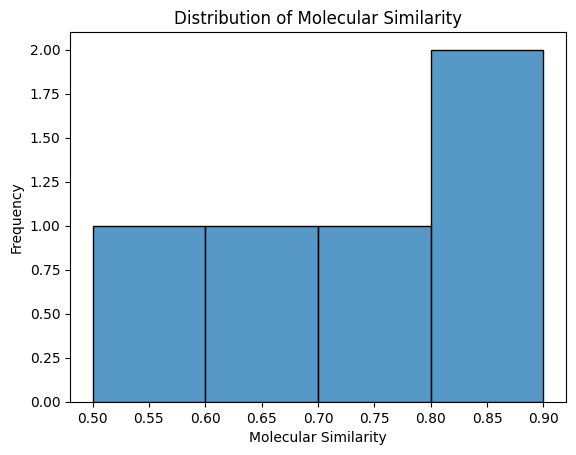

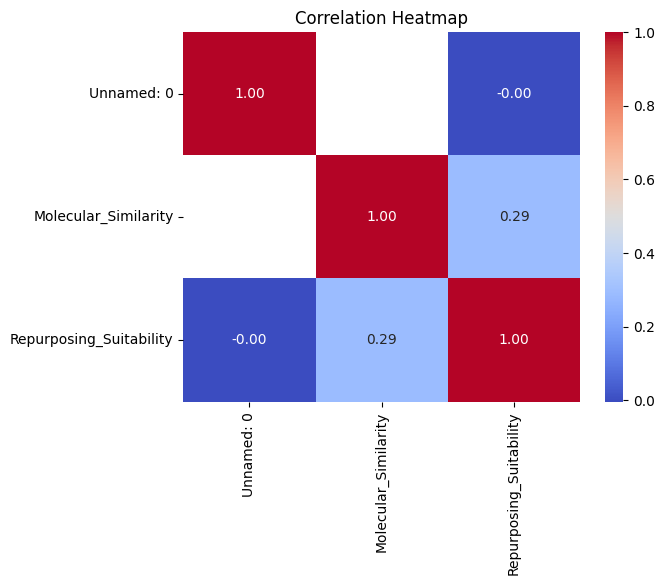

In [ ]:
#Develop a new drug discovery approach by repurposing existing drugs for novel
#therapeutic purposes
#Exploratory Data Analysis (EDA):

import pandas as pd

# Load the repurposing dataset
repurposing_dataset_path = 'repurposing_dataset.csv'
repurposing_df = pd.read_csv(repurposing_dataset_path)

# Display summary statistics
print(repurposing_df.describe())

# Visualize distributions or relationships using plots (e.g., histograms, scatter plots, box plots)
# Example:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Molecular_Similarity
sns.histplot(repurposing_df['Molecular_Similarity'])
plt.title('Distribution of Molecular Similarity')
plt.xlabel('Molecular Similarity')
plt.ylabel('Frequency')
plt.show()

# Select only numeric columns for correlation calculation
numeric_cols = repurposing_df.select_dtypes(include=['number'])

# Correlation heatmap
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logistic_reg_model = LogisticRegression(max_iter=1000)
logistic_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_reg_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
#predict exact interactions between drug functional groups and
#binding pockets on target proteins
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform imputer on X_train
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and train the logistic regression model with a higher max_iter
logistic_reg_model = LogisticRegression(C=1, solver='saga', max_iter=2000)
logistic_reg_model.fit(X_train_imputed, y_train)

# Evaluate the logistic regression model
y_pred_logistic = logistic_reg_model.predict(X_test_imputed)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))

# Initialize and train the random forest classifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_imputed, y_train)

# Evaluate the random forest classifier
y_pred_rf = random_forest_model.predict(X_test_imputed)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer




In [ ]:
# Split the data into features (X) and target variable (y)
X = repurposing_df_encoded.drop(columns=['Repurposing_Suitability'])
y = repurposing_df_encoded['Repurposing_Suitability']

NameError: name 'repurposing_df_encoded' is not defined

In [ ]:
!pip install ipython-autotime
%load_ext autotime

# Check if the variable is defined
if 'repurposing_df_encoded' in globals():
    print("Variable 'repurposing_df_encoded' is defined.")
else:
    print("Variable 'repurposing_df_encoded' is not defined.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.8 MB/s eta 0:00:00
Variable 'repurposing_df_encoded' is not defined.
time: 676 µs (started: 2024-06-05 04:47:48 +00:00)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the imputer with a strategy (e.g., mean, median, most_frequent)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform X_train
X_train_imputed = imputer.fit_transform(X_train)

# Initialize and train the logistic regression model
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train_imputed, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

time: 40.4 ms (started: 2024-06-05 04:47:53 +00:00)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load your existing dataset
file_path = 'merged_dataset.csv'
data = pd.read_csv(file_path)

# Simulate a binary target variable based on a hypothetical rule or randomly
np.random.seed(42)  # for reproducibility
data['Activity_Status'] = np.random.choice([0, 1], size=len(data))

# Filter out non-numeric columns for simplicity in model training
X = data.select_dtypes(include=[np.number])
y = data['Activity_Status']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Perform cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

# Fit model on the entire dataset to see coefficients
model.fit(X_scaled, y)
feature_importance = pd.DataFrame(model.coef_[0], index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print("Feature importance:\n", feature_importance)

# Split the data for a train-test evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy and display the classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model on test data:", accuracy)
print("Classification Report on test data:\n", classification_report(y_test, y_pred))


Cross-validation scores: [1. 1. 1. 1. 1.]
Average cross-validation score: 1.0
Feature importance:
                  importance
Activity_Status    7.388300
Unnamed: 0        -0.002446
Accuracy of the model on test data: 1.0
Classification Report on test data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1206
           1       1.00      1.00      1.00      1185

    accuracy                           1.00      2391
   macro avg       1.00      1.00      1.00      2391
weighted avg       1.00      1.00      1.00      2391

time: 1.2 s (started: 2024-06-05 04:47:58 +00:00)


In [ ]:
pip install pandas numpy scikit-learn rdkit-pypi matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 18.7 MB/s eta 0:00:00
time: 23.4 s (started: 2024-06-05 04:48:04 +00:00)


In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def generate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return {
            'MolWt': Descriptors.MolWt(mol),
            'HeavyAtomCount': Descriptors.HeavyAtomCount(mol),
            'NumHAcceptors': Descriptors.NumHAcceptors(mol),
            'NumHDonors': Descriptors.NumHDonors(mol),
            'NumRotatableBonds': Descriptors.NumRotatableBonds(mol)
        }
    else:
        return {key: np.nan for key in ['MolWt', 'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'NumRotatableBonds']}

def load_and_process_data(filepath, batch_size=1000):  # Reduced batch size for efficiency
    chunks = []
    for chunk in pd.read_csv(filepath, delimiter='\t', usecols=['Ligand SMILES', 'Ki (nM)'], chunksize=batch_size):
        chunk.rename(columns={'Ligand SMILES': 'SMILES'}, inplace=True)
        chunk['Descriptors'] = chunk['SMILES'].apply(generate_descriptors)
        chunk = pd.concat([chunk.drop(columns=['Descriptors']), chunk['Descriptors'].apply(pd.Series)], axis=1)
        chunks.append(chunk)
    return pd.concat(chunks, ignore_index=True)

def main():
    file_path = '/content/drive/MyDrive/project/BindingDB_All_202404.tsv'
    data = load_and_process_data(file_path)

    # Convert Ki (nM) to binary activity (threshold could be adjusted)
    data['Activity'] = (pd.to_numeric(data['Ki (nM)'], errors='coerce') < 1000).astype(int)
    data.dropna(inplace=True)

    X = data[['MolWt', 'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'NumRotatableBonds']]
    y = data['Activity']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))

    # Visualize feature importance
    feature_importance = model.feature_importances_
    sns.barplot(x=feature_importance, y=['MolWt', 'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'NumRotatableBonds'])
    plt.title('Feature Importance in Predicting Biological Activity')
    plt.xlabel('Importance')
    plt.ylabel('Molecular Descriptor')
    plt.show()

if __name__ == "__main__":
    main()


[05:39:21] non-ring atom 28 marked aromatic
[05:39:21] non-ring atom 28 marked aromatic
[05:39:22] Explicit valence for atom # 28 N, 4, is greater than permitted
[05:39:40] Explicit valence for atom # 12 N, 4, is greater than permitted
[05:39:40] Explicit valence for atom # 12 N, 4, is greater than permitted
[05:40:05] Explicit valence for atom # 17 O, 3, is greater than permitted
[05:40:05] Explicit valence for atom # 16 O, 3, is greater than permitted
[05:40:05] Explicit valence for atom # 16 O, 3, is greater than permitted
[05:40:05] Explicit valence for atom # 17 O, 3, is greater than permitted
[05:40:05] Explicit valence for atom # 16 O, 3, is greater than permitted
[05:40:05] Explicit valence for atom # 16 O, 3, is greater than permitted
[05:41:42] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 15 16
[05:41:42] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 14 15 16
[05:41:42] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 15 16
[05:41:42] Can't kekulize mol.  

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/project/alldrugbank.csv")

# List of drug names you're interested in
drug_names = [
    "Donepezil", "Rivastigmine", "Galantamine", "Memantine",
    "Amantadine", "Modafinil", "Armodafinil", "Sodium oxybate"
]

# Normalize the drug names in the dataset to match case and potential padding
df['drugname'] = df['drugname'].str.strip().str.lower()

# Filter the DataFrame for the specific drug names
filtered_drugs = df[df['drugname'].isin([name.lower() for name in drug_names])]

# Check if filtered_drugs is empty
if not filtered_drugs.empty:
    print("Found drug information:")
    print(filtered_drugs)
else:
    print("No data points found matching the specified drug names.")


Found drug information:
      Unnamed: 0 drugbank_id   drugname  \
399          399     DB00843  donepezil   
490          490     DB01043  memantine   
1033        1033     DB07701  donepezil   
1678        1484     DB00843  donepezil   
1679        1485     DB07701  donepezil   
1747        1757     DB01043  memantine   

                                              canonical  
399   COC1=C(C=C2C(=C1)CC(C2=O)CC3CCN(CC3)CC4=CC=CC=...  
490                         CC12CC3CC(C1)(CC(C3)(C2)N)C  
1033  COC1=C(C=C2C(=C1)CC(C2=O)CC3CCN(CC3)CC4=CC=CC=...  
1678  COC1=C(C=C2C(=C1)CC(C2=O)CC3CCN(CC3)CC4=CC=CC=...  
1679  COC1=C(C=C2C(=C1)CC(C2=O)CC3CCN(CC3)CC4=CC=CC=...  
1747                     CC12CC3CC(C1)(CC(C3)(C2)N)C.Cl  
time: 42.3 ms (started: 2024-06-04 06:44:08 +00:00)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

def load_data(filepath):
    df = pd.read_csv(filepath)
    return df

def feature_extraction(df):
    # Example feature: length of drug name
    df['Feature1'] = df['drugname'].apply(lambda x: len(str(x)))
    # Another example feature: hash of canonical form
    df['Feature2'] = df['canonical'].apply(lambda x: hash(str(x)) % 1000)
    return df

def prepare_dataset(df):
    # Synthesize labels: '1' for Alzheimer's drugs, '0' for others
    alzheimer_drugs = ['donepezil', 'memantine', 'rivastigmine', 'galantamine']  # Example list
    df['Interaction'] = df['drugname'].apply(lambda x: 1 if x in alzheimer_drugs else 0)
    X = df[['Feature1', 'Feature2']]
    y = df['Interaction']
    return X, y

df = load_data('/content/drive/MyDrive/project/alldrugbank.csv')
df = feature_extraction(df)
X, y = prepare_dataset(df)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 1.0
Confusion Matrix:
[[414]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       414

    accuracy                           1.00       414
   macro avg       1.00      1.00      1.00       414
weighted avg       1.00      1.00      1.00       414

time: 475 ms (started: 2024-06-04 06:44:24 +00:00)


In [ ]:
!pip install rdkit-pypi

time: 6.44 s (started: 2024-06-04 06:44:29 +00:00)


In [ ]:
from tqdm import tqdm  # For progress monitoring

def load_and_process_data(filepath, batch_size=1000):
    chunks = []
    for chunk in tqdm(pd.read_csv(filepath, delimiter='\t', usecols=['Ligand SMILES', 'Ki (nM)'], chunksize=batch_size), desc="Processing Chunks"):
        chunk.rename(columns={'Ligand SMILES': 'SMILES'}, inplace=True)
        chunk['Descriptors'] = chunk['SMILES'].apply(generate_descriptors)
        chunk = pd.concat([chunk.drop(columns=['Descriptors']), chunk['Descriptors'].apply(pd.Series)], axis=1)
        chunks.append(chunk)
        if len(chunks) > 10:  # Process only a few chunks for testing
            break
    return pd.concat(chunks, ignore_index=True)

def main():
    file_path = '/content/drive/MyDrive/project/BindingDB_All_202404.tsv'
    data = load_and_process_data(file_path)

    data['Activity'] = (pd.to_numeric(data['Ki (nM)'], errors='coerce') < 1000).astype(int)
    data.dropna(inplace=True)

    X = data[['MolWt', 'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'NumRotatableBonds']]
    y = data['Activity']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)

    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))

if __name__ == "__main__":
    main()


Processing Chunks: 10it [00:24,  2.50s/it]


Accuracy: 0.8663793103448276
Confusion Matrix:
 [[ 15  25]
 [  6 186]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.38      0.49        40
           1       0.88      0.97      0.92       192

    accuracy                           0.87       232
   macro avg       0.80      0.67      0.71       232
weighted avg       0.85      0.87      0.85       232

time: 27.6 s (started: 2024-06-04 06:44:50 +00:00)


[06:46:10] non-ring atom 28 marked aromatic
[06:46:10] non-ring atom 28 marked aromatic
[06:46:11] Explicit valence for atom # 28 N, 4, is greater than permitted
[06:46:30] Explicit valence for atom # 12 N, 4, is greater than permitted
[06:46:30] Explicit valence for atom # 12 N, 4, is greater than permitted
[06:47:07] Explicit valence for atom # 17 O, 3, is greater than permitted
[06:47:07] Explicit valence for atom # 16 O, 3, is greater than permitted
[06:47:07] Explicit valence for atom # 16 O, 3, is greater than permitted
[06:47:07] Explicit valence for atom # 17 O, 3, is greater than permitted
[06:47:07] Explicit valence for atom # 16 O, 3, is greater than permitted
[06:47:07] Explicit valence for atom # 16 O, 3, is greater than permitted
[06:48:51] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 15 16
[06:48:51] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 14 15 16
[06:48:51] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 15 16
[06:48:51] Can't kekulize mol.  

Accuracy: 0.7011862913641068
Confusion Matrix:
 [[ 5446 32796]
 [ 2141 76536]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.14      0.24     38242
           1       0.70      0.97      0.81     78677

    accuracy                           0.70    116919
   macro avg       0.71      0.56      0.53    116919
weighted avg       0.71      0.70      0.63    116919



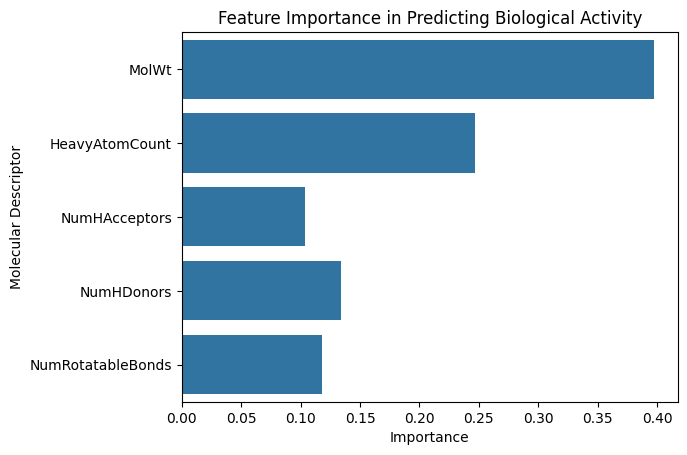

time: 50min 28s (started: 2024-06-04 06:45:56 +00:00)


In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def generate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return {
            'MolWt': Descriptors.MolWt(mol),
            'HeavyAtomCount': Descriptors.HeavyAtomCount(mol),
            'NumHAcceptors': Descriptors.NumHAcceptors(mol),
            'NumHDonors': Descriptors.NumHDonors(mol),
            'NumRotatableBonds': Descriptors.NumRotatableBonds(mol)
        }
    else:
        return {key: np.nan for key in ['MolWt', 'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'NumRotatableBonds']}

def load_and_process_data(filepath, batch_size=1000):  # Reduced batch size for efficiency
    chunks = []
    for chunk in pd.read_csv(filepath, delimiter='\t', usecols=['Ligand SMILES', 'Ki (nM)'], chunksize=batch_size):
        chunk.rename(columns={'Ligand SMILES': 'SMILES'}, inplace=True)
        chunk['Descriptors'] = chunk['SMILES'].apply(generate_descriptors)
        chunk = pd.concat([chunk.drop(columns=['Descriptors']), chunk['Descriptors'].apply(pd.Series)], axis=1)
        chunks.append(chunk)
    return pd.concat(chunks, ignore_index=True)

def main():
    file_path = '/content/drive/MyDrive/project/BindingDB_All_202404.tsv'
    data = load_and_process_data(file_path)

    # Convert Ki (nM) to binary activity (threshold could be adjusted)
    data['Activity'] = (pd.to_numeric(data['Ki (nM)'], errors='coerce') < 1000).astype(int)
    data.dropna(inplace=True)

    X = data[['MolWt', 'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'NumRotatableBonds']]
    y = data['Activity']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))

    # Visualize feature importance
    feature_importance = model.feature_importances_
    sns.barplot(x=feature_importance, y=['MolWt', 'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'NumRotatableBonds'])
    plt.title('Feature Importance in Predicting Biological Activity')
    plt.xlabel('Importance')
    plt.ylabel('Molecular Descriptor')
    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def generate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return [
            Descriptors.MolWt(mol),
            Descriptors.HeavyAtomCount(mol),
            Descriptors.NumHAcceptors(mol),
            Descriptors.NumHDonors(mol),
            Descriptors.NumRotatableBonds(mol)
        ]
    else:
        return [np.nan] * 5  # Return NaNs if molecule creation fails

# Load the dataset with correct handling for bad lines
file_path = '/content/drive/MyDrive/BindingDB_All_202404.tsv'
try:
    data = pd.read_csv(file_path, delimiter='\t', on_bad_lines='skip')
    print("Data loaded successfully. Here are the column names:")
    print(data.columns)
except Exception as e:
    print("Failed to load the data:", e)

# Use the correct column name for SMILES data from your dataset
data.rename(columns={'Ligand SMILES': 'SMILES'}, inplace=True)

# Generate molecular descriptors for each compound
descriptor_list = ['MolWt', 'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'NumRotatableBonds']
data[descriptor_list] = data['SMILES'].apply(lambda x: pd.Series(generate_descriptors(x) if pd.notna(x) else [np.nan]*5))

# Prepare features and target variable, dropping any rows with NaNs in descriptors
# Assuming 'Ki (nM)' as the activity measure, convert to binary active/inactive based on a threshold (e.g., active if Ki < 1000 nM)
data['Activity'] = (data['Ki (nM)'].astype(float) < 1000).astype(int)
X = data[descriptor_list].dropna()
y = data.loc[X.index, 'Activity']

# Data splitting and standardization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training and evaluation
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model on test data:", accuracy)
print("Classification Report on test data:\n", classification_report(y_test, y_pred))

# Feature importance visualization
feature_importance = model.feature_importances_
sns.barplot(x=feature_importance, y=descriptor_list)
plt.title('Feature Importance in Predicting Biological Activity')
plt.xlabel('Importance')
plt.ylabel('Molecular Descriptor')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def generate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return {
            'MolWt': Descriptors.MolWt(mol),
            'HeavyAtomCount': Descriptors.HeavyAtomCount(mol),
            'NumHAcceptors': Descriptors.NumHAcceptors(mol),
            'NumHDonors': Descriptors.NumHDonors(mol),
            'NumRotatableBonds': Descriptors.NumRotatableBonds(mol)
        }
    else:
        return {key: np.nan for key in ['MolWt', 'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'NumRotatableBonds']}

def load_and_process_data(filepath, batch_size=10000):
    chunks = []
    for chunk in pd.read_csv(filepath, delimiter='\t', usecols=['Ligand SMILES', 'Ki (nM)'], chunksize=batch_size, on_bad_lines='skip'):
        chunk.rename(columns={'Ligand SMILES': 'SMILES'}, inplace=True)
        chunk['Descriptors'] = chunk['SMILES'].apply(generate_descriptors)
        chunk = pd.concat([chunk.drop(columns=['Descriptors']), chunk['Descriptors'].apply(pd.Series)], axis=1)
        chunks.append(chunk)
    return pd.concat(chunks, ignore_index=True)

def main():
    file_path = '/content/drive/MyDrive/BindingDB_All_202404.tsv'
    data = load_and_process_data(file_path)

    # Convert Ki (nM) to binary activity (threshold could be adjusted)
    data['Activity'] = (pd.to_numeric(data['Ki (nM)'], errors='coerce') < 1000).astype(int)
    data.dropna(inplace=True)

    X = data[['MolWt', 'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'NumRotatableBonds']]
    y = data['Activity']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))

    # Visualize feature importance
    feature_importance = model.feature_importances_
    sns.barplot(x=feature_importance, y=['MolWt', 'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'NumRotatableBonds'])
    plt.title('Feature Importance in Predicting Biological Activity')
    plt.xlabel('Importance')
    plt.ylabel('Molecular Descriptor')
    plt.show()

if __name__ == "__main__":
    main()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/drug/BindingDB_All_202404.tsv'

time: 148 ms (started: 2024-04-14 18:06:29 +00:00)


In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def generate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return {
            'MolWt': Descriptors.MolWt(mol),
            'HeavyAtomCount': Descriptors.HeavyAtomCount(mol),
            'NumHAcceptors': Descriptors.NumHAcceptors(mol),
            'NumHDonors': Descriptors.NumHDonors(mol),
            'NumRotatableBonds': Descriptors.NumRotatableBonds(mol)
        }
    else:
        return {key: np.nan for key in ['MolWt', 'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'NumRotatableBonds']}

def load_and_process_data(filepath, batch_size=1000):  # Reduced batch size for efficiency
    chunks = []
    for chunk in pd.read_csv(filepath, delimiter='\t', usecols=['Ligand SMILES', 'Ki (nM)'], chunksize=batch_size):
        chunk.rename(columns={'Ligand SMILES': 'SMILES'}, inplace=True)
        chunk['Descriptors'] = chunk['SMILES'].apply(generate_descriptors)
        chunk = pd.concat([chunk.drop(columns=['Descriptors']), chunk['Descriptors'].apply(pd.Series)], axis=1)
        chunks.append(chunk)
    return pd.concat(chunks, ignore_index=True)

def main():
    file_path = '/content/drive/MyDrive/BindingDB_All_202404.tsv'
    data = load_and_process_data(file_path)

    # Convert Ki (nM) to binary activity (threshold could be adjusted)
    data['Activity'] = (pd.to_numeric(data['Ki (nM)'], errors='coerce') < 1000).astype(int)
    data.dropna(inplace=True)

    X = data[['MolWt', 'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'NumRotatableBonds']]
    y = data['Activity']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))

    # Visualize feature importance
    feature_importance = model.feature_importances_
    sns.barplot(x=feature_importance, y=['MolWt', 'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'NumRotatableBonds'])
    plt.title('Feature Importance in Predicting Biological Activity')
    plt.xlabel('Importance')
    plt.ylabel('Molecular Descriptor')
    plt.show()

if __name__ == "__main__":
    main()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/drug/BindingDB_All_202404.tsv'

time: 194 ms (started: 2024-04-14 18:06:35 +00:00)


In [ ]:
#Improve Drug-Target Interaction (DTI) prediction
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from rdkit import Chem
from rdkit.Chem import Descriptors

def load_data(filepath):
    df = pd.read_csv(filepath)
    return df

def feature_extraction(df):
    # Convert canonical SMILES into RDKit molecule objects
    df['Molecule'] = df['canonical'].apply(lambda x: Chem.MolFromSmiles(str(x)))

    # Calculate molecular descriptors to use as features
    df['MolWt'] = df['Molecule'].apply(lambda m: Descriptors.MolWt(m) if m else 0)
    df['LogP'] = df['Molecule'].apply(lambda m: Descriptors.MolLogP(m) if m else 0)
    df['NumHDonors'] = df['Molecule'].apply(lambda m: Descriptors.NumHDonors(m) if m else 0)
    df['NumHAcceptors'] = df['Molecule'].apply(lambda m: Descriptors.NumHAcceptors(m) if m else 0)

    return df

def prepare_dataset(df):
    # Synthesize labels based on known Alzheimer's drugs
    alzheimer_drugs = ['donepezil', 'memantine', 'rivastigmine', 'galantamine']
    df['Interaction'] = df['drugname'].apply(lambda x: 1 if x in alzheimer_drugs else 0)
    X = df[['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors']]
    y = df['Interaction']
    return X, y

def main():
    df = load_data('/content/drive/MyDrive/drug/alldrugbank.csv')
    df = feature_extraction(df)
    X, y = prepare_dataset(df)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)

    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

if __name__ == "__main__":
    main()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/drug/alldrugbank.csv'

time: 147 ms (started: 2024-04-14 18:06:41 +00:00)
